In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading data file
train_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')


In [3]:
### Merging both train and test file to a single one using pd.concat, perform feature engineering 
###and then again dividing them later

## Creating a new Dataframe 'data ' with an extra variable 'root' specifying where each observation belong

train_data['root']='train'
test_data['root']= 'test'

#merging both train and test

data=pd.concat([train_data,test_data],ignore_index=True, sort=False)

#displaying top of dataset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,root
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
#Displaying tail of dataset

data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,root
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [5]:
## Checking for shape of the data

print('Shape of train_data:',train_data.shape)
print('Shape of test_data:',test_data.shape)
print('Shape of merged Dataframe data :',data.shape)

Shape of train_data: (8523, 13)
Shape of test_data: (5681, 12)
Shape of merged Dataframe data : (14204, 13)


In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
root                          object
dtype: object

In [7]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
root                             2
dtype: int64

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
root                            0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

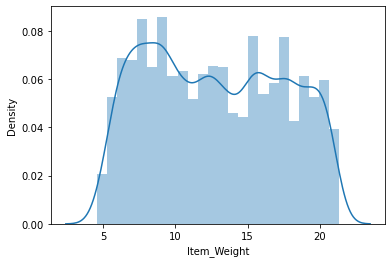

In [9]:
###Lets see for distribution plot of 'item_Weight', 'Outlet_Size', 'Item_Outlet_Sales '

## Since, 'Outlet_Size' is catagorical type. Hence repalcing null values with mode of that particular attribute.

sns.distplot(data['Item_Weight'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

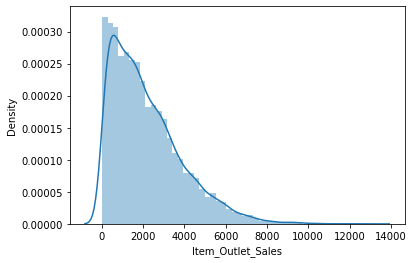

In [10]:
sns.distplot(data['Item_Outlet_Sales'])

In [11]:
#repalcing nan values for Item weight
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

#repalcing nan values for Item_Outlet_Sales
data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].median())

#repalcing nan values for Outlet_Size
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])


In [12]:
#Now checking for null values in data after filling missing values.

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
root                         0
dtype: int64

In [13]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2026.522094
std,4.234226,0.051459,62.086938,8.371664,1335.388924
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

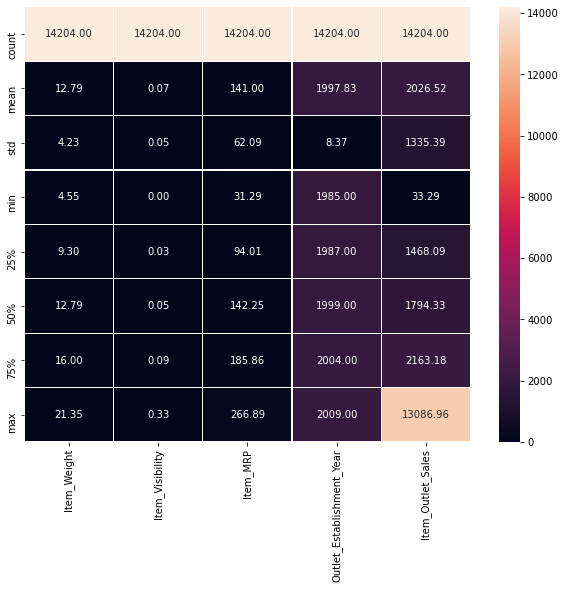

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.describe(),annot=True,linecolor='white',fmt='.2f',linewidths=0.1)

In [15]:
## Data Visulaization of Nominal data with categorical types.

data_visualization_nominal=data[['Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Establishment_Year', 
                                 'Outlet_Size', 'Outlet_Location_Type' ,'Outlet_Type', 
                                 'Item_Identifier']].copy()



In [16]:
data_visualization_nominal.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Identifier'],
      dtype='object')

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


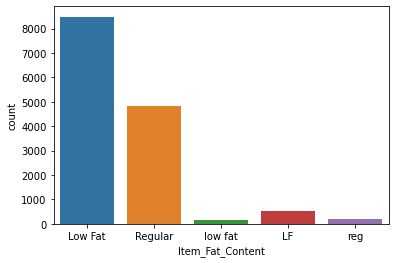

In [17]:
#Visulaization for catagorical columns using count plot

ax=sns.countplot(data['Item_Fat_Content'])
print(data['Item_Fat_Content'].value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


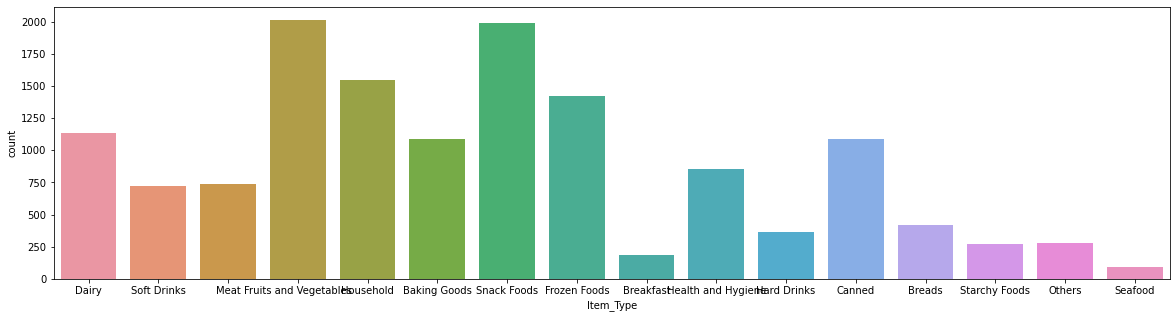

In [18]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data['Item_Type'])
print(data['Item_Type'].value_counts())

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


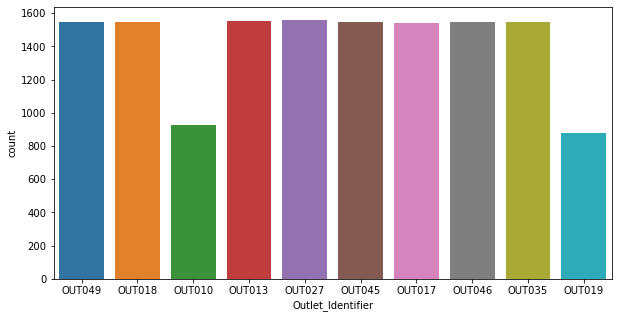

In [19]:

plt.figure(figsize=(10,5))
ax=sns.countplot(data['Outlet_Identifier'])
print(data['Outlet_Identifier'].value_counts())

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64


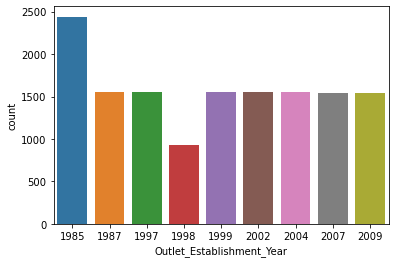

In [20]:
ax=sns.countplot(data['Outlet_Establishment_Year'])
print(data['Outlet_Establishment_Year'].value_counts())

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


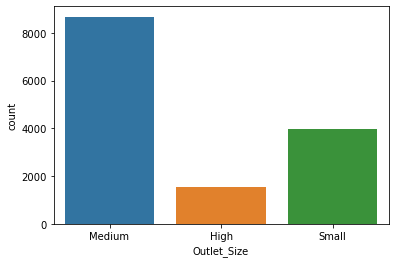

In [21]:
ax=sns.countplot(data['Outlet_Size'])
print(data['Outlet_Size'].value_counts())

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


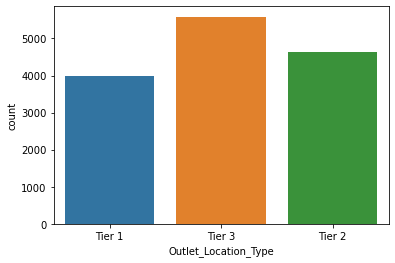

In [22]:
ax=sns.countplot(data['Outlet_Location_Type'])
print(data['Outlet_Location_Type'].value_counts())

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


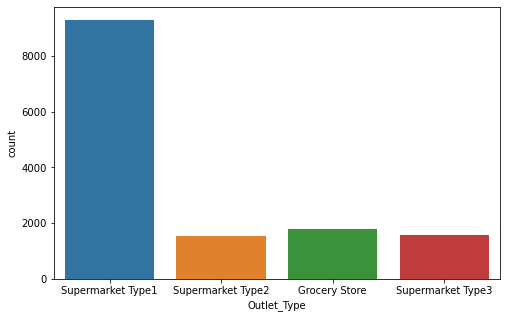

In [23]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data['Outlet_Type'])
print(data['Outlet_Type'].value_counts())

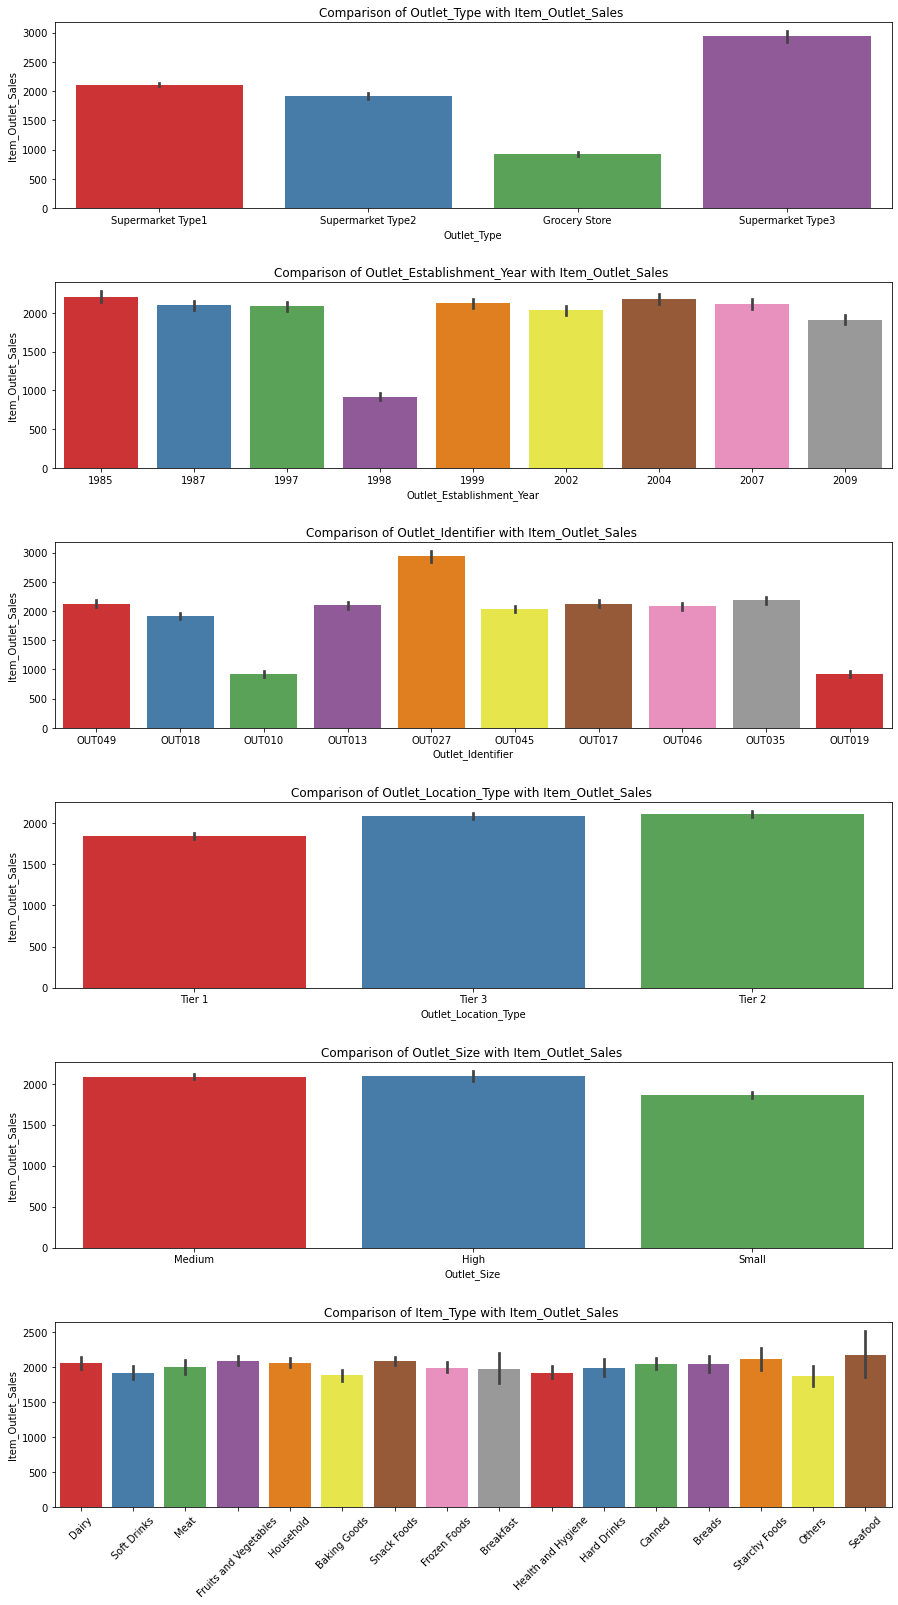

In [24]:
# Bivariate Ananlysis: Compariosn with output variable.
plt.figure(figsize=(15,15))

plt.subplot(611)
ax=sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data, palette="Set1")
plt.title('Comparison of Outlet_Type with Item_Outlet_Sales ')

plt.subplot(612)
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data, palette="Set1")
plt.title('Comparison of Outlet_Establishment_Year with Item_Outlet_Sales ')

plt.subplot(613)
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data, palette="Set1")
plt.title('Comparison of Outlet_Identifier with Item_Outlet_Sales ')

plt.subplot(614)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data, palette="Set1")
plt.title('Comparison of Outlet_Location_Type with Item_Outlet_Sales ')

plt.subplot(615)
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data, palette="Set1")
plt.title('Comparison of Outlet_Size with Item_Outlet_Sales ')

plt.subplot(616)
ax=sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data, palette="Set1")
ax.set_title('Comparison of Item_Type with Item_Outlet_Sales ')
ax.set_xlabel("", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show()

In [25]:
### Feature Engineering

##Step-1_ Observed minimum values 0 for Item_visibility which  makes no practical sense.
         #Let's consider this 0 value as missing value and replace with mean value.
    

before=(data['Item_Visibility']==0)
print('Number of 0 values initially: %d' %sum(before))

average_visibility=data['Item_Visibility'].mean()

data['Item_Visibility']=data['Item_Visibility'].replace(0,average_visibility)
    
after=(data['Item_Visibility']==0)
print('Number of 0 values after modification: %d' %sum(after))


Number of 0 values initially: 879
Number of 0 values after modification: 0


In [26]:
## Step-2_ Item_Identifier has unique ID for each item : FD, DR & NC.
#FD: Food
#DR : Drinks
#NC: Non-Consumables
### Creating a new column uisng first two charachters of ID.

#getting first 2 charachters
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])

data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Text(0.5, 1.0, 'Comparison of Outlet_Size with Item_Type ')

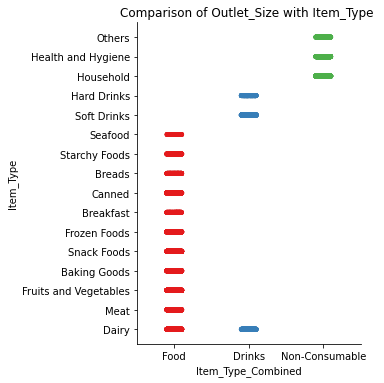

In [27]:
sns.catplot(x='Item_Type_Combined',y='Item_Type',data=data, palette="Set1")
plt.title('Comparison of Outlet_Size with Item_Type ')

Text(0.5, 1.0, 'Comparison of Outlet_Size with Item_Outlet_Sales ')

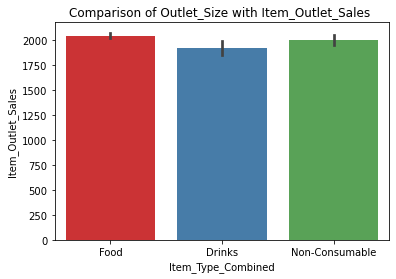

In [28]:
sns.barplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=data, palette="Set1")
plt.title('Comparison of Outlet_Size with Item_Outlet_Sales ')


In [29]:
##Step-3_ Modifying categories in Item_Fat_Content

# We had already seen that, Low fat is mis printed as low fat or lf
# Also regular is miscoded as regular.
# Hence, replacing miscoded categories with the actual ones.

print('Categories in Dataset :')
print(data['Item_Fat_Content'].value_counts())



Categories in Dataset :
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [30]:
print('Categories after Modification :')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})


print(data['Item_Fat_Content'].value_counts())

Categories after Modification :
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [31]:
#In step-2 we had non consumables which donot come under Low fat catagory.
#hence cretaing new catagory for non consumables in 'Item_Fat_Content'

data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [32]:
#Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [33]:
cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in cols:
    data[i] = le.fit_transform(data[i])

In [34]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
root                          object
Item_Type_Combined             int32
Outlet                         int64
dtype: object

In [35]:
data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet
Item_Weight,1.000000,-0.009391,-0.015313,0.033002,0.000462,0.001580,-0.002104,0.001699,0.010686,0.062660,0.003274
Item_Fat_Content,-0.009391,1.000000,0.018177,-0.000289,-0.000231,-0.000277,0.001068,-0.000801,0.011153,0.187207,-0.001019
Item_Visibility,-0.015313,0.018177,1.000000,-0.008790,-0.088598,0.067343,-0.019464,-0.173660,-0.102550,-0.054886,-0.109090
Item_MRP,0.033002,-0.000289,-0.008790,1.000000,0.000141,-0.001018,0.000838,0.000136,0.436478,0.030219,-0.000555
Outlet_Establishment_Year,0.000462,-0.000231,-0.088598,0.000141,1.000000,0.193392,-0.089328,-0.122519,-0.037651,-0.002226,0.079047
Outlet_Size,0.001580,-0.000277,0.067343,-0.001018,0.193392,1.000000,-0.614300,-0.201505,-0.066094,0.002040,0.504580
Outlet_Location_Type,-0.002104,0.001068,-0.019464,0.000838,-0.089328,-0.614300,1.000000,0.467251,0.068526,-0.002572,-0.716151
Outlet_Type,0.001699,-0.000801,-0.173660,0.000136,-0.122519,-0.201505,0.467251,1.000000,0.307826,-0.001956,0.099899
Item_Outlet_Sales,0.010686,0.011153,-0.102550,0.436478,-0.037651,-0.066094,0.068526,0.307826,1.000000,0.007777,0.124457
Item_Type_Combined,0.062660,0.187207,-0.054886,0.030219,-0.002226,0.002040,-0.002572,-0.001956,0.007777,1.000000,0.001090


<AxesSubplot:>

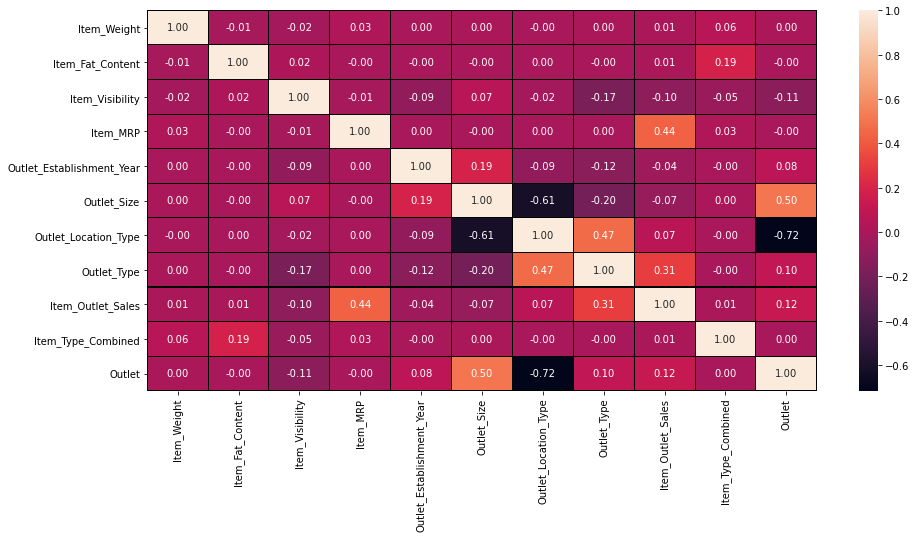

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),linecolor='black',linewidth=0.1,annot=True,fmt='0.2f')

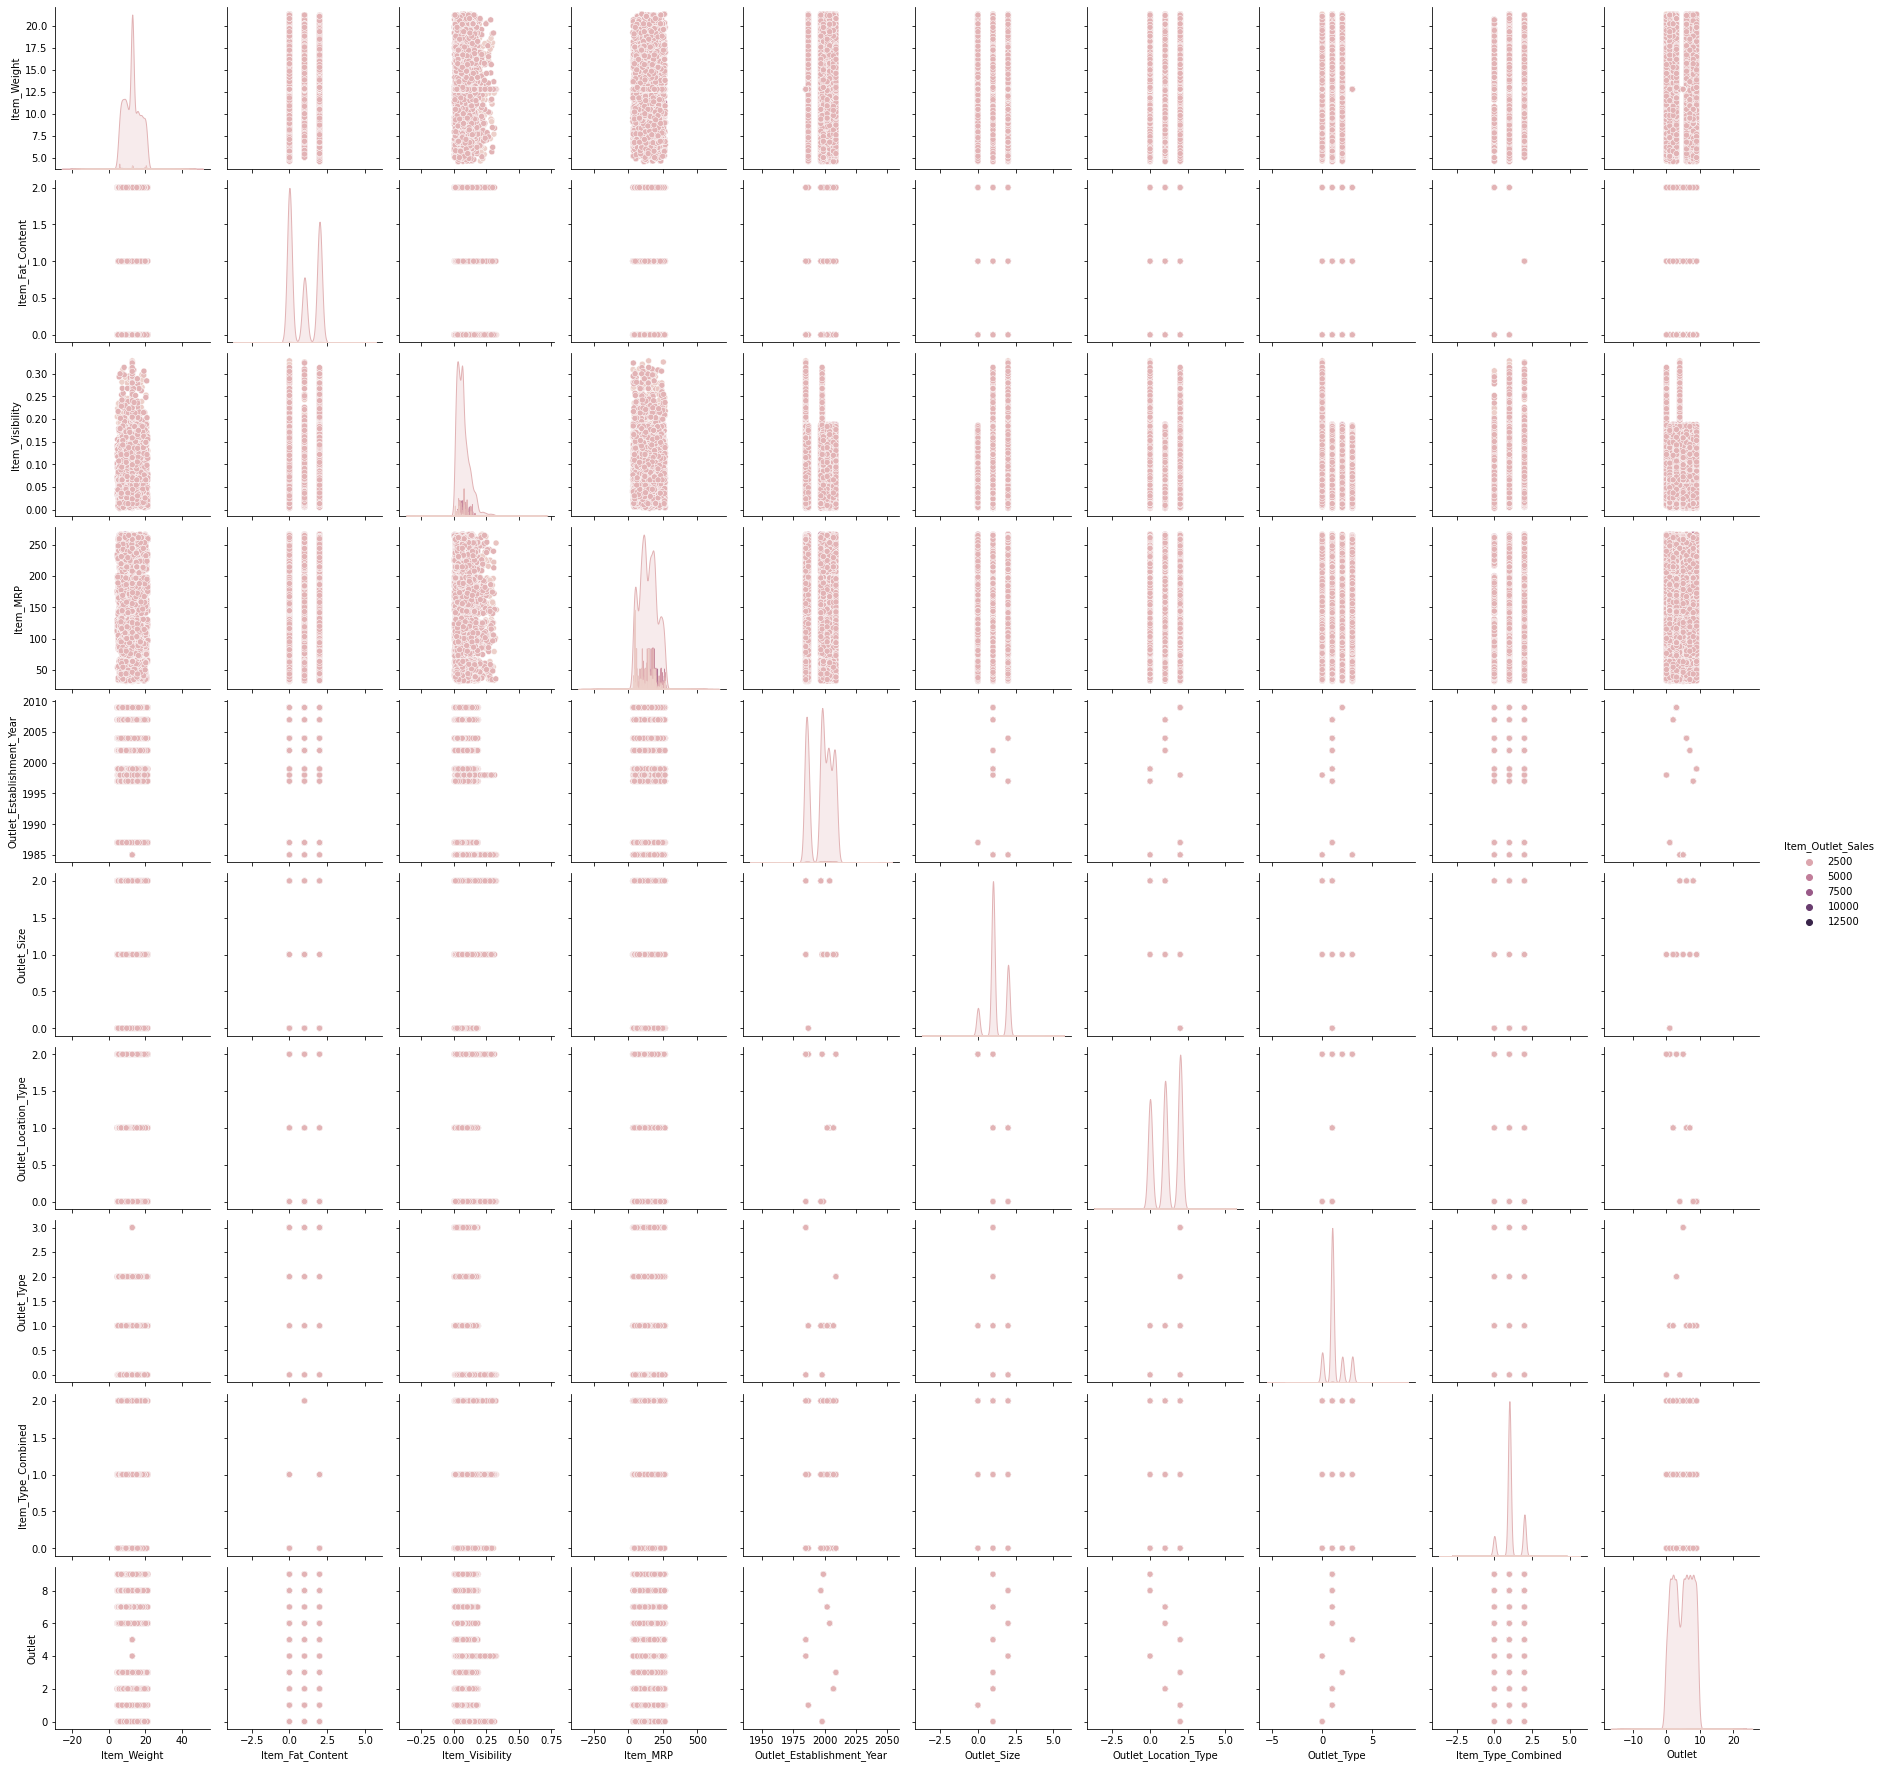

In [37]:
sns.pairplot(data,hue='Item_Outlet_Sales')

In [38]:
## Splitting training and testing model

#Drop the columns which have been converted to different types:
data.drop(['Item_Type'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['root']=="train"]
test = data.loc[data['root']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','root'],axis=1,inplace=True)
train.drop(['root'],axis=1,inplace=True)


In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,1,0,1,3735.1380,1,9
1,DRC01,5.92,2,0.019278,48.2692,OUT018,2009,1,2,2,443.4228,0,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,1,0,1,2097.2700,1,9
3,FDX07,19.20,2,0.065953,182.0950,OUT010,1998,1,2,0,732.3800,1,0
4,NCD19,8.93,1,0.065953,53.8614,OUT013,1987,0,2,1,994.7052,2,1


In [40]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet
8523,FDW58,20.750000,0,0.007565,107.8622,OUT049,1999,1,0,1,1,9
8524,FDW14,8.300000,2,0.038428,87.3198,OUT017,2007,1,1,1,1,2
8525,NCN55,14.600000,1,0.099575,241.7538,OUT010,1998,1,2,0,2,0
8526,FDQ58,7.315000,0,0.015388,155.0340,OUT017,2007,1,1,1,1,2
8527,FDY38,12.792854,2,0.118599,234.2300,OUT027,1985,1,2,3,1,5


In [41]:
train.shape, test.shape

((8523, 13), (5681, 12))

In [42]:
ID_col=['Item_Identifier','Outlet_Identifier']

In [43]:
x_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train= train['Item_Outlet_Sales']

In [44]:
x_train.shape, y_train.shape

((8523, 10), (8523,))

In [45]:
x_test = test.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [46]:

# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [47]:
from sklearn.linear_model import  LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting the test set results
pred_test = LR.predict(x_test)
pred_train = LR.predict(x_train)

#testing accuracy
lr_accuracy = LR.score(x_train,y_train) * 100
print('Score for LinearRegression Model:',lr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_lr=r2_score(y_train, pred_train)
print('r2_score for Linear regreesion:',R2S_lr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for Linear Regression:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for Linear Regression:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for Linear Regression:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_LR = cross_val_score(LR, x_train, y_train, cv=5).mean()*100
print('CV score for Linear regression:',cv_score_LR)

Score for LinearRegression Model: 51.03392668247455
-------------------------------------------------------------------------------------------------------------------
r2_score for Linear regreesion: 0.5103392668247455
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for Linear Regression: 897.188333280247
Mean Squared Error for Linear Regression: 1425793.7596440823
Root mean squared error for Linear Regression: 1194.0660616750156
-------------------------------------------------------------------------------------------------------------------
CV score for Linear regression: 50.812115054301344


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

# Predicting the test set results
pred_test = knn.predict(x_test)
pred_train = knn.predict(x_train)

#testing accuracy
knn_accuracy = knn.score(x_train,y_train) * 100
print('Score for KNeighborsRegressor Model:',knn_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_knn=r2_score(y_train, pred_train)
print('r2_score for KNeighborsRegressor:',R2S_knn)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for KNeighborsRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for KNeighborsRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for KNeighborsRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_knn = cross_val_score(knn, x_train, y_train, cv=5).mean()*100
print('CV score for KNeighborsRegressor:',cv_score_knn)

Score for KNeighborsRegressor Model: 67.42856115373907
-------------------------------------------------------------------------------------------------------------------
r2_score for KNeighborsRegressor: 0.6742856115373906
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for KNeighborsRegressor: 678.9077685697525
Mean Squared Error for KNeighborsRegressor: 948414.9147202763
Root mean squared error for KNeighborsRegressor: 973.865963426321
-------------------------------------------------------------------------------------------------------------------
CV score for KNeighborsRegressor: 52.02977774151621


In [49]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

# Predicting the test set results
pred_test = svr.predict(x_test)
pred_train = svr.predict(x_train)

#testing accuracy
svr_accuracy = svr.score(x_train,y_train) * 100
print('Score for SVR Model:',svr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_svr=r2_score(y_train, pred_train)
print('r2_score for SVR:',R2S_svr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for SVR:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for SVR:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for SVR:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_svr = cross_val_score(knn, x_train, y_train, cv=5).mean()*100
print('CV score for SVR:',cv_score_svr)

Score for SVR Model: -4.610036176175836
-------------------------------------------------------------------------------------------------------------------
r2_score for SVR: -0.04610036176175836
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for SVR: 1307.3789587324854
Mean Squared Error for SVR: 3046034.257412062
Root mean squared error for SVR: 1745.289161546608
-------------------------------------------------------------------------------------------------------------------
CV score for SVR: 52.02977774151621


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train, y_train)

# Predicting the test set results
pred_test = dtc.predict(x_test)
pred_train = dtc.predict(x_train)

#testing accuracy
dtc_accuracy = dtc.score(x_train,y_train) * 100
print('Score for DecisionTreeRegressor Model:',dtc_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_dtc=r2_score(y_train, pred_train)
print('r2_score for DecisionTreeRegressor:',R2S_dtc)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for DecisionTreeRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for DecisionTreeRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for DecisionTreeRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_dtc = cross_val_score(dtc, x_train, y_train, cv=5).mean()*100
print('CV score for DecisionTreeRegressor:',cv_score_dtc)

Score for DecisionTreeRegressor Model: 100.0
-------------------------------------------------------------------------------------------------------------------
r2_score for DecisionTreeRegressor: 1.0
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for DecisionTreeRegressor: 0.0
Mean Squared Error for DecisionTreeRegressor: 0.0
Root mean squared error for DecisionTreeRegressor: 0.0
-------------------------------------------------------------------------------------------------------------------
CV score for DecisionTreeRegressor: 15.919181401637807


In [51]:
#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)

# Predicting the test set results
pred_test = ada.predict(x_test)
pred_train = ada.predict(x_train)

#testing accuracy
ada_accuracy = ada.score(x_train,y_train) * 100
print('Score for AdaBoostRegressor:',ada_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_ada=r2_score(y_train, pred_train)
print('r2_score for AdaBoostRegressor:',R2S_ada)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for AdaBoostRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for AdaBoostRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for AdaBoostRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_ada = cross_val_score(ada, x_train, y_train, cv=5).mean()*100
print('CV score for AdaBoostRegressor:',cv_score_ada)

Score for AdaBoostRegressor: 50.247491231723515
-------------------------------------------------------------------------------------------------------------------
r2_score for AdaBoostRegressor: 0.5024749123172352
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for AdaBoostRegressor: 945.5733094994139
Mean Squared Error for AdaBoostRegressor: 1448693.181265509
Root mean squared error for AdaBoostRegressor: 1203.6167086184494
-------------------------------------------------------------------------------------------------------------------
CV score for AdaBoostRegressor: 49.461799514819624


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbst = GradientBoostingRegressor()
gbst.fit(x_train, y_train)

# Predicting the test set results
pred_test = gbst.predict(x_test)
pred_train = gbst.predict(x_train)

#testing accuracy
gbst_accuracy = gbst.score(x_train,y_train) * 100
print('Score for GradientBoostingRegressor:',gbst_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_gbst=r2_score(y_train, pred_train)
print('r2_score for GradientBoostingRegressor:',R2S_gbst)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for GradientBoostingRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for GradientBoostingRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for GradientBoostingRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_gbst = cross_val_score(gbst, x_train, y_train, cv=5).mean()*100
print('CV score for GradientBoostingRegressor:',cv_score_gbst)

Score for GradientBoostingRegressor: 62.91760463396834
-------------------------------------------------------------------------------------------------------------------
r2_score for GradientBoostingRegressor: 0.6291760463396834
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for GradientBoostingRegressor: 731.3062490694499
Mean Squared Error for GradientBoostingRegressor: 1079764.91320204
Root mean squared error for GradientBoostingRegressor: 1039.1173721972123
-------------------------------------------------------------------------------------------------------------------
CV score for GradientBoostingRegressor: 59.44676417993211


In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Predicting the test set results
pred_test = rfr.predict(x_test)
pred_train = rfr.predict(x_train)

#testing accuracy
rfr_accuracy = rfr.score(x_train,y_train) * 100
print('Score for RandomForestRegressor:',rfr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_rfr=r2_score(y_train, pred_train)
print('r2_score for RandomForestRegressor:',R2S_rfr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for RandomForestRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for RandomForestRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for RandomForestRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_rfr = cross_val_score(rfr, x_train, y_train, cv=5).mean()*100
print('CV score for RandomForestRegressor:',cv_score_rfr)

Score for RandomForestRegressor: 93.81181613006932
-------------------------------------------------------------------------------------------------------------------
r2_score for RandomForestRegressor: 0.9381181613006931
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for RandomForestRegressor: 294.00382729344125
Mean Squared Error for RandomForestRegressor: 180187.49202255261
Root mean squared error for RandomForestRegressor: 424.48497266988454
-------------------------------------------------------------------------------------------------------------------
CV score for RandomForestRegressor: 54.626742001377856


In [54]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

# Predicting the test set results
pred_test = etr.predict(x_test)
pred_train = etr.predict(x_train)

#testing accuracy
etr_accuracy = etr.score(x_train,y_train) * 100
print('Score for ExtraTreesRegressor:',etr_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')
#Measuring for r2_score
R2S_etr=r2_score(y_train, pred_train)
print('r2_score for ExtraTreesRegressor:',R2S_etr)

print('-------------------------------------------------------------------------------------------------------------------')
print('Error:')
print('Mean Absolute Error for ExtraTreesRegressor:',mean_absolute_error(y_train,pred_train))
print('Mean Squared Error for ExtraTreesRegressor:',mean_squared_error(y_train,pred_train))
print('Root mean squared error for ExtraTreesRegressor:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('-------------------------------------------------------------------------------------------------------------------')
#Perform cross-validation:
cv_score_etr = cross_val_score(etr, x_train, y_train, cv=5).mean()*100
print('CV score for ExtraTreesRegressor:',cv_score_etr)

Score for ExtraTreesRegressor: 99.99999103698212
-------------------------------------------------------------------------------------------------------------------
r2_score for ExtraTreesRegressor: 0.9999999103698213
-------------------------------------------------------------------------------------------------------------------
Error:
Mean Absolute Error for ExtraTreesRegressor: 0.011281806408693003
Mean Squared Error for ExtraTreesRegressor: 0.26098508779345164
Root mean squared error for ExtraTreesRegressor: 0.5108669961873165
-------------------------------------------------------------------------------------------------------------------
CV score for ExtraTreesRegressor: 51.2023035161173


In [55]:
### Hyper parameter Tuning.
##importing library
from sklearn.model_selection import GridSearchCV
#ExtraTrees 

ex_param_grid = {"max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]}

#Create new ETC object
ETC_2 = ExtraTreesRegressor()

#Use GridSearch
GCV = GridSearchCV(ETC_2, ex_param_grid, cv=5)

#Fit the model
best_model = GCV.fit(x_train,y_train)

#checking for best parameters
GCV.best_params_

{'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [63]:
### Hyper parameter Tuning.

## Decision tree Regressor
dtc_param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]}

#Create new DTC object
DTC_2 = DecisionTreeRegressor()

#Use GridSearch
GCV = GridSearchCV(DTC_2, dtc_param_grid, cv=5)

#Fit the model
best_model = GCV.fit(x_train,y_train)

#checking for best parameters
GCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 50}

In [65]:
#Creating Final Model after hyperparameter tuning for Decision tree Regressor

f_mod_DTC= DecisionTreeRegressor(max_depth=5,min_samples_leaf=50)
f_mod_DTC.fit(x_train, y_train)

y_pred = f_mod_DTC.predict(x_train)

#testing accuracy
dtc_accuracy = f_mod_DTC.score(x_train,y_train) * 100
print('Score for DecisionTreeRegressor:',dtc_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')

#Measuring for r2_score
R2S_dtc=r2_score(y_train, y_pred)
print('r2_score for DecisionTreeRegressor:',R2S_dtc)

Score for DecisionTreeRegressor: 60.35534517452157
-------------------------------------------------------------------------------------------------------------------
r2_score for DecisionTreeRegressor: 0.6035534517452157


In [66]:
#Creating Final Model after hyperparameter tuning for ExtraTreesRegressor

f_mod_ETC= ExtraTreesRegressor(max_features=10,min_samples_split=2,
                                min_samples_leaf=2)
f_mod_ETC.fit(x_train, y_train)

y_pred = f_mod_ETC.predict(x_train)

#testing accuracy
etc_accuracy = f_mod_ETC.score(x_train,y_train) * 100
print('Score for ExtraTreesRegressor:',etc_accuracy )
print('-------------------------------------------------------------------------------------------------------------------')

#Measuring for r2_score
R2S_etc=r2_score(y_train, y_pred)
print('r2_score for ExtraTreesRegressor after hyper parameter tuning:',R2S_etr*100)

Score for ExtraTreesRegressor: 90.47029379834703
-------------------------------------------------------------------------------------------------------------------
r2_score for ExtraTreesRegressor after hyper parameter tuning: 99.99999103698212


# Hence the best model with highest accuracy is Extra Tree regressor with 99.99% accuracy.

In [67]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_ETC,'Big_Data_Mart_Sales_Prediction_etc.obj')

['Big_Data_Mart_Sales_Prediction_etc.obj']